**Sessions EDA, Feature Engineering**

Before going ahead with sessions dataset please do see 'User Feature Extraction, Analysis, Engineering.ipynb' python note book.

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
%cd /root
!kaggle competitions download -c 'airbnb-recruiting-new-user-bookings'

/root
  0% 0.00/1.03M [00:00<?, ?B/s]
100% 1.03M/1.03M [00:00<00:00, 34.7MB/s]
  0% 0.00/546 [00:00<?, ?B/s]
100% 546/546 [00:00<00:00, 450kB/s]
  0% 0.00/2.46k [00:00<?, ?B/s]
100% 2.46k/2.46k [00:00<00:00, 1.99MB/s]
  0% 0.00/4.07M [00:00<?, ?B/s]
100% 4.07M/4.07M [00:00<00:00, 37.3MB/s]
 83% 49.0M/59.1M [00:00<00:00, 84.5MB/s]
100% 59.1M/59.1M [00:00<00:00, 108MB/s] 
  0% 0.00/478k [00:00<?, ?B/s]
100% 478k/478k [00:00<00:00, 155MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%cd /root

/root


In [ ]:
train_data=pd.read_csv('train_users_2.csv.zip',compression='zip')
sessions_data=pd.read_csv('sessions.csv.zip',compression='zip')
test_data=pd.read_csv('test_users.csv.zip',compression='zip')

In [ ]:
test_data.shape

(62096, 15)

In [ ]:
%cd /content/drive/MyDrive/Airbnb trail

/content/drive/MyDrive/Airbnb trail


In [ ]:
X_train_data=pd.read_csv('Train_feature_engineered.csv')
X_cv_data=pd.read_csv('Cv_feature_engineered.csv')
X_test_data=pd.read_csv('Test_feature_engineered.csv')

In [ ]:
X_train_data.drop('Unnamed: 0',axis=1,inplace=True)
X_cv_data.drop('Unnamed: 0',axis=1,inplace=True)
X_test_data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
print(X_train_data.shape)
print(X_cv_data.shape)
print(X_test_data.shape)

(62742, 94)
(11073, 94)
(62096, 93)


In [ ]:
sessions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [ ]:
sessions_data.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [ ]:
print("Shape of sessions data:",sessions_data.shape)

Shape of sessions data: (10567737, 6)


In [ ]:
print("Missing values in session data")
sessions_data.isna().sum()

Missing values in session data


user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

Here we could see some null values in the dataset for user id. We have to neglect those because without these user id information we cannot merge it with train users dataset.

In [ ]:
sessions_data.dropna(subset=['user_id'],inplace=True)

In [ ]:
print("shape:",sessions_data.shape)

shape: (10533241, 6)


Now we split sessions data based on id in train_users dataset and test_users dataset so that we can process on train_users dataset.

In [ ]:
sessions_train=sessions_data.merge(X_train_data['id'],left_on='user_id',right_on='id',how='inner').drop('id',axis=1)
sessions_cv=sessions_data.merge(X_cv_data['id'],left_on='user_id',right_on='id',how='inner').drop('id',axis=1)
sessions_test=sessions_data.merge(X_test_data['id'],left_on='user_id',right_on='id',how='inner').drop('id',axis=1)

In [ ]:
print("Sessions train shape:",sessions_train.shape)
print("Sessions cv shape:",sessions_cv.shape)
print("Sessions test shape:",sessions_test.shape)

Sessions train shape: (4699402, 6)
Sessions cv shape: (838555, 6)
Sessions test shape: (4995284, 6)


Here in sessions notebook we will be dealing train,cross validation and test data individually because the feature extraction needs a higher RAM if done combined.

#Train Sessions#

Let us fill the nan values in action,action_detail,action_type,device_type with 'unknown' string. 

In [ ]:
sessions_train.action.fillna("unkown_action",inplace=True)
sessions_train.action_detail.fillna('unknow_action_detail',inplace=True)
sessions_train.action_type.fillna('unkown_action_type',inplace=True)
sessions_train.device_type.fillna('unkown_device_type',inplace=True)

In [ ]:
print("Number of unique action:",len(sessions_train.action.unique()))

Number of unique action: 324


In [ ]:
print("Unique action:",len(sessions_train.action.unique()))
print("Unique action type:",len(sessions_train.action_type.unique()))
print("Unique action detail:",len(sessions_train.action_detail.unique()))
print("Unique device type:",len(sessions_train.device_type.unique()))

Unique action: 324
Unique action type: 10
Unique action detail: 129
Unique device type: 14


In [ ]:
#printing unique actions and their number of occurances in sessions train
act = dict(zip(*np.unique(sessions_train.action, return_counts=True)))
act

{'10': 1405,
 '11': 252,
 '12': 1138,
 '15': 478,
 'about_us': 157,
 'account': 4504,
 'acculynk_bin_check_success': 5,
 'acculynk_load_pin_pad': 5,
 'acculynk_pin_pad_inactive': 4,
 'acculynk_session_obtained': 5,
 'active': 72619,
 'add_guests': 48,
 'add_note': 482,
 'agree_terms_check': 1801,
 'agree_terms_uncheck': 75,
 'airbnb_picks': 120,
 'airbrb': 3,
 'ajax_check_dates': 31341,
 'ajax_get_referrals_amt': 9545,
 'ajax_get_results': 311,
 'ajax_google_translate': 178,
 'ajax_google_translate_description': 470,
 'ajax_google_translate_reviews': 416,
 'ajax_image_upload': 6442,
 'ajax_ldp': 15,
 'ajax_lwlb_contact': 19243,
 'ajax_payout_edit': 414,
 'ajax_payout_options_by_country': 399,
 'ajax_payout_split_edit': 3,
 'ajax_photo_widget': 8,
 'ajax_photo_widget_form_iframe': 11149,
 'ajax_price_and_availability': 96,
 'ajax_referral_banner_experiment_type': 4149,
 'ajax_referral_banner_type': 3759,
 'ajax_refresh_subtotal': 267620,
 'ajax_send_message': 17,
 'ajax_special_offer_da

In [ ]:
#Code Reference: https://www.kaggle.com/svpons/feature-engineering

#Action values with low frequency are changed to 'OTHER'
act_freq = 20  #Threshold for frequency
act = dict(zip(*np.unique(sessions_train.action, return_counts=True)))
sessions_train.action = sessions_train.action.apply(lambda x: 'OTHER' if act[x] < act_freq else x)

In [ ]:
print("Unique actions in sessions train:",len(sessions_train.action.unique()))

Unique actions in sessions train: 247


There are many actions which have very few occurances. Let us change those actions which have few occurances to 'Other' string. Here we keep threshold as 20 which means we keep those actions which have occurances more than 20.

In [ ]:
print("Unique action type:",len(sessions_train.action_type.unique()))
print("Unique action detail:",len(sessions_train.action_detail.unique()))
print("Unique device type:",len(sessions_train.device_type.unique()))

Unique action type: 10
Unique action detail: 129
Unique device type: 14


In [ ]:
sessions_train.action_type.unique()

array(['unkown_action_type', 'click', 'data', 'view', 'submit',
       'message_post', '-unknown-', 'booking_request', 'partner_callback',
       'booking_response'], dtype=object)

###Feature Engineering###

There are a lot of features to be extracted from sessions data. Types of features that are about to be extracted are listed below:



1.   Total number of records we have for an id (1)
2.   Count of occurances of each action (247)
2.  Count of occurances of each action_detail (129)
2.   Count of occurances of each action_type (10)
1.   Count of occurances of each device_type (14)
1.   Total sum of secs elapsed (1)
2.   Mean of secs elapsed (1)
1.   Standard deviation of secs elapsed (1)
2.   Median of secs elapsed (1)
1.   Number of actions less than 60 seconds (1)
2.   Number of actions within 1 min to 10 min (1)
1.   Number of actions within 10 min to 2 hrs (1)
2.   Number of actions within 2 hrs to 24 hrs (1)
1.   Number of actions more than 24 hrs (1)
2.   Percentage( or ratio) of presence of an action (247)
1.   Percentage( or ratio) of presence of an action type (10)

The numbers in the bracket shows how many features does that information contains. Overall we will be having 667 features.














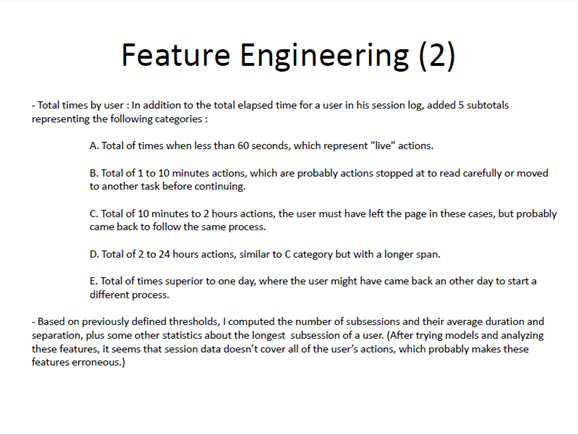

Reference link:

https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/discussion/18973

In [ ]:
from tqdm import tqdm
index_of_action=sessions_train.action.value_counts().argsort()
index_of_action_details=sessions_train.action_detail.value_counts().argsort()
index_of_action_type=sessions_train.action_type.value_counts().argsort()
index_of_device_type=sessions_train.device_type.value_counts().argsort()

sess_id_group=sessions_train.groupby(['user_id'])

samples = []
cont = 0
ln = len(sess_id_group)
for id_session in tqdm(sess_id_group):
    details_of_id = id_session[1]
    l = []
      
    #the id
    l.append(id_session[0])
      
    #The actual first feature is the number of values.
    l.append(len(details_of_id))

    #For Action 
    #Number of times unique action value occurs
    feature_action=[0]*len(index_of_action)
    for i,action in enumerate(details_of_id.action.values):
      feature_action[index_of_action[action]]+=1
    l=l+feature_action

    #For action_detail
    #Number of times unique action_detail value occurs
    feature_action_detail=[0]*len(index_of_action_details)
    for i,action in enumerate(details_of_id.action_detail.values):
      feature_action_detail[index_of_action_details[action]]+=1
    l=l+feature_action_detail


    #For action_type 
    #Number of times unique action_type value occurs
    feature_action_type=[0]*len(index_of_action_type)
    for i,action in enumerate(details_of_id.action_type.values):
      feature_action_type[index_of_action_type[action]]+=1
    l=l+feature_action_type

    #For Device type
    #Number of times unique device_type value occurs
    feature_device_type=[0]*len(index_of_device_type)
    for i,device in enumerate(details_of_id.device_type.values):
      feature_device_type[index_of_device_type[device]]+=1
    l=l+feature_device_type

    #For seconds elapsed 
    secs=details_of_id.secs_elapsed.fillna(0).values
    feature_secs=[0]*4
    if len(secs)>0:
      feature_secs[0]=np.sum(secs)
      feature_secs[1]=np.mean(secs)
      feature_secs[2]=np.std(secs)
      feature_secs[3]=np.median(secs)
    l=l+feature_secs

    #Secs elapsed representation
    feature_action_secs_elapsed_represent=[0]*5
    details_of_id.secs_elapsed.fillna(0,inplace=True)
    if len(secs)>0:
      for i,action in enumerate(details_of_id.action.unique()):
        sec_elapsed_sum=details_of_id[details_of_id.action==action]['secs_elapsed'].values.sum()
        if sec_elapsed_sum<=60:#less than a minute
          feature_action_secs_elapsed_represent[0]+=1
        elif sec_elapsed_sum>60 and sec_elapsed_sum<=600:#between 1 minute to 10 minute
          feature_action_secs_elapsed_represent[1]+=1
        elif sec_elapsed_sum>600 and sec_elapsed_sum<=7200:#between 10 minutes to 2 hours
          feature_action_secs_elapsed_represent[2]+=1
        elif sec_elapsed_sum>7200 and sec_elapsed_sum<=86400:#between 2 hours to 24 hours
          feature_action_secs_elapsed_represent[3]+=1
        elif sec_elapsed_sum>86400: #greater than 24 hours
          feature_action_secs_elapsed_represent[4]+=1        
    l=l+feature_action_secs_elapsed_represent

    #Percentage of presence of an action in the id
    feature_action_presence=[0]*len(index_of_action)
    for i,action in enumerate(details_of_id.action.unique()):
      feature_action_presence[index_of_action[action]]+=details_of_id[details_of_id.action==action].count()['action']/len(details_of_id.action)
    l=l+feature_action_presence

    #percentage of presence of action type in id
    #Here the nan values are filled as 'unkown_action_type' while calculating the presence of the given action type we will exclude this value as it does not make sense for calculating the ratios fo the given action type.
    action_type_unique_counts=np.unique(details_of_id.action_type,return_counts=True)#This returns count of each unique action type
    unknown_action_index=np.where(action_type_unique_counts[0]=='unkown_action_type')#Here we get the index of the value 'unkown_action_type'.
    unique_action_type=np.delete(action_type_unique_counts[0],unknown_action_index)#We delete the 'unkown_action_type' value and save the unique actions in the variable 'unique_action_type'
    unique_action_type_count=np.delete(action_type_unique_counts[1],unknown_action_index)#In the variable 'unique_action_type_count' we save the count of each unique action type except for 'unkown_action_type.'
    feature_action_type_presence=[0]*len(index_of_action_type)
    for i,action in enumerate(details_of_id.action_type.unique()):
      if action!='unkown_action_type':
        action_type_index=np.where(unique_action_type==action)#Gets the index of the action type so that we could get the corresponding count of the action type
        action_type_count=unique_action_type_count[action_type_index]
        feature_action_type_presence[index_of_action_type[action]]+=action_type_count[0]/np.sum(unique_action_type_count)#Counts only the percentage of presence of the action type within the given action type.
    l=l+feature_action_type_presence
    samples.append(l)

100%|██████████| 62742/62742 [27:14<00:00, 38.39it/s]


In [ ]:
samples=np.array(samples)

In [ ]:
samples.shape

(62742, 668)

We get the expected 667+id feature.

In [ ]:
#Setting Column names
column_names=[]

index_of_action=sessions_train.action.value_counts().argsort()
index_of_action_details=sessions_train.action_detail.value_counts().argsort()
index_of_action_type=sessions_train.action_type.value_counts().argsort()
index_of_device_type=sessions_train.device_type.value_counts().argsort()


#count
column_names.append('id')
column_names.append('no_of_records')
to_add_list=[0]*len(index_of_action)
for i in index_of_action.keys():
  to_add_list[index_of_action[i]]=i+' (count)'
column_names=column_names+to_add_list
to_add_list=[0]*len(index_of_action_details)
for i in index_of_action_details.keys():
  to_add_list[index_of_action_details[i]]=i+' (count)'
column_names=column_names+to_add_list
to_add_list=[0]*len(index_of_action_type)
for i in index_of_action_type.keys():
  to_add_list[index_of_action_type[i]]=i+' (count)'
column_names=column_names+to_add_list
to_add_list=[0]*len(index_of_device_type)
for i in index_of_device_type.keys():
  to_add_list[index_of_device_type[i]]=i+' (count)'
column_names=column_names+to_add_list
column_names.append('sum_of_secs_elapsed')
column_names.append('mean_of_secs_elapsed')
column_names.append('std_of_secs_elapsed')
column_names.append('median_of_secs_elapsed')
column_names.append('less_than_equal_60sec_count')
column_names.append('1min_to_10min_count')
column_names.append('10min_to_1hr_count')
column_names.append('1hr_to_1day_count')
column_names.append('more_than_1day_count')
to_add_list=[0]*len(index_of_action)
for i in index_of_action.keys():
  to_add_list[index_of_action[i]]=i+' (action presence)%'
column_names=column_names+to_add_list
to_add_list=[0]*len(index_of_action_type)
for i in index_of_action_type.keys():
  to_add_list[index_of_action_type[i]]=i+' (action type presence)%'
column_names=column_names+to_add_list
print(len(column_names))

668


In [ ]:
len(index_of_action_type)

10

Lets convert it into Pandas Dataframe.

In [ ]:
sessions_train_preprocessed=pd.DataFrame(samples,columns=column_names)

We have seen that the value in the action type 'unkown_action_type' has not been considered for the presence. So we just drop the column because it only has the value 0.

In [ ]:
sessions_train_preprocessed.drop(['unkown_action_type (action type presence)%'],inplace=True,axis=1)

In [ ]:
print(sessions_train_preprocessed.shape)

(62742, 667)


In [ ]:
preprocessed_train=sessions_train_preprocessed.merge(X_train_data,how='inner',left_on='id',right_on='id')
preprocessed_train.to_csv('/content/drive/MyDrive/Airbnb trail/overall_preprocessed_train.csv')

In [ ]:
index_of_action.to_csv('/content/drive/MyDrive/Airbnb trail/index_of_action.csv')
index_of_action_type.to_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_type.csv')
index_of_action_details.to_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_details.csv')
index_of_device_type.to_csv('/content/drive/MyDrive/Airbnb trail/index_of_device_type.csv')

###Analysis of train sessions data###

Let us analyse the sessions dataset

In [ ]:
sessions_train_preprocessed

,id,no_of_records,change_availability (count),create_paypal (count),departments (count),host_2013 (count),locations (count),unread (count),slideshow (count),phone_verification_call_taking_too_long (count),badge (count),p4_terms (count),invalid_action (count),hospitality (count),social (count),founders (count),show_code (count),detect_fb_session (count),how_it_works (count),ajax_worth (count),payoneer_account_redirect (count),request_photography (count),phone_verification_phone_number_removed (count),hospitality_standards (count),home_safety_landing (count),multi_message_attributes (count),reputation (count),press_release (count),multi_message (count),clear_reservation (count),concierge (count),add_guests (count),widget (count),office_location (count),check (count),place_worth (count),change_password (count),become_user (count),p4_refund_policy_terms (count),why_host (count),...,show_personalize (action presence)%,identity (action presence)%,other_hosting_reviews_first (action presence)%,listings (action presence)%,ask_question (action presence)%,requested (action presence)%,unavailabilities (action presence)%,confirm_email (action presence)%,ajax_check_dates (action presence)%,calendar_tab_inner2 (action presence)%,qt2 (action presence)%,campaigns (action presence)%,unkown_action (action presence)%,edit (action presence)%,collections (action presence)%,track_page_view (action presence)%,dashboard (action presence)%,header_userpic (action presence)%,create (action presence)%,active (action presence)%,reviews (action presence)%,lookup (action presence)%,social_connections (action presence)%,search (action presence)%,update (action presence)%,similar_listings (action presence)%,ajax_refresh_subtotal (action presence)%,search_results (action presence)%,personalize (action presence)%,index (action presence)%,show (action presence)%,booking_response (action type presence)%,partner_callback (action type presence)%,booking_request (action type presence)%,message_post (action type presence)%,submit (action type presence)%,-unknown- (action type presence)%,click (action type presence)%,data (action type presence)%,view (action type presence)%
0,00023iyk9l,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.125,0,0.025,0,0,0,0,0.025,0,0,0,0.1,0.05,0,0,0,0,0,0,0,0.075,0.05,0.025,0.1,0.1,0.225,0,0.02702702702702703,0.02702702702702703,0.02702702702702703,0,0,0.10810810810810811,0.24324324324324326,0.5675675675675675
1,0028jgx1x1,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.03225806451612903,0.03225806451612903,0.16129032258064516,0,0,0.2903225806451613,0,0,0,0,0,0,0.4838709677419355,0,0,0,0,0.03225806451612903,0.03225806451612903,0.2903225806451613,0.16129032258064516,0.4838709677419355
2,002qnbzfs5,789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0025348542458808617,0,0.044359949302915085,0,0,0.026615969581749048,0.0012674271229404308,0,0,0,0.035487959442332066,0.008871989860583017,0,0,0,0.0025348542458808617,0.0025348542458808617,0.026615969581749048,0.036755386565272496,0.016476552598225603,0,0.09125475285171103,0.15842839036755388,0.016476552598225603,0,0,0,0,0.14575411913814956,0.29404309252217997,0,0,0.0014044943820224719,0.02247191011235955,0.021067415730337078,0.25842696629213485,0.19662921348314608,0.19662921348314608,0.30337078651685395
3,0035hobuyj,489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.002044989775051125,0,0.00408997955010225,0,0.00408997955010225,0,0,0.002044989775051125,0.00408997955010225,0,0.010224948875255624,0,0.006134969325153374,0,0,0,0.006134969325153374,0.00408997955010225,0.002044989775051125,0,0,0.30265848670756645,0,0,0.010224948875255624,0.024539877300613498,0.04294478527607362,0.36809815950920244,0.053169734151329244,0.04703476482617587,0.09611451942740286,0,0,0,0.009433962264150943,0.012578616352201259,0.028301

In [ ]:
sessions_train_analysis=sessions_train_preprocessed.merge(train_data[['id','country_destination']],on='id')

Let us check how much percentage of user id in train users data is covered in sessions data.

Text(0.5, 1.0, 'Number of users in and not in train sessions dataset')

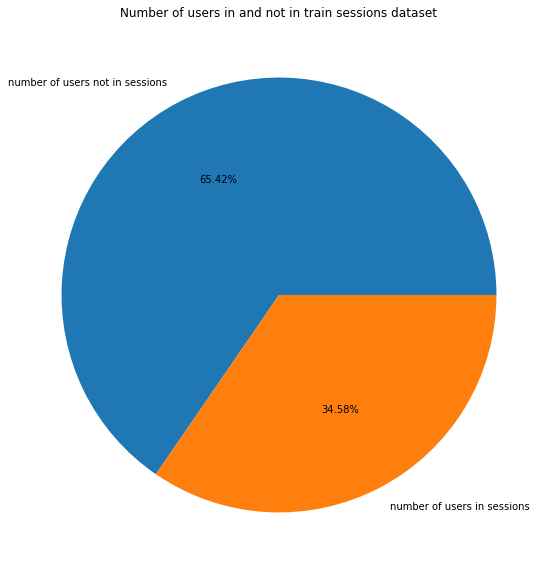

In [ ]:
overall_sessions_id=(set(sessions_train['user_id']).union(sessions_cv['user_id']))
train_users_id=set(train_data['id'])
number_left_out=len(train_users_id.difference(overall_sessions_id))
number_included=len(overall_sessions_id)

plt.figure(figsize=(15,10))
plt.pie([number_left_out,number_included],labels=['number of users not in sessions','number of users in sessions'],autopct='%1.2f%%')
plt.title("Number of users in and not in train sessions dataset")

We can see that 34.58% of users in training data are covered in sessions dataset. Which chows we had discarded about 65% of users data in the train_user csv file.

Let us check how much sessions data cover test users dataset

Text(0.5, 1.0, 'Number of users in and not in test sessions dataset')

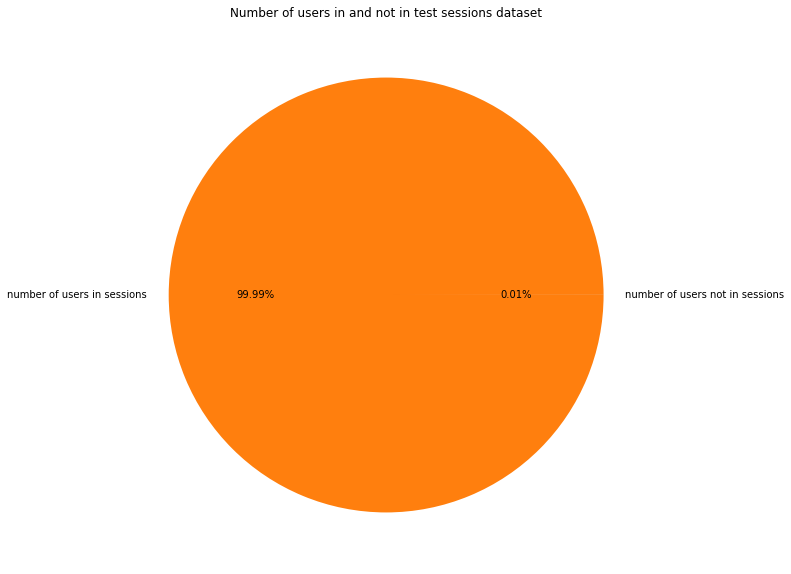

In [ ]:
overall_sessions_id=set(sessions_test['user_id'])
test_users_id=set(test_data['id'])
number_left_out=len(test_users_id.difference(overall_sessions_id))
number_included=len(sessions_test['user_id'])

plt.figure(figsize=(15,10))
plt.pie([number_left_out,number_included],labels=['number of users not in sessions','number of users in sessions'],autopct='%1.2f%%')
plt.title("Number of users in and not in test sessions dataset")

We could see that almost 99.99% of user id in test data are covered in sessions data. This shows us how important the sessions data can be useful. 

Text(0.5, 1.0, 'Top 10 actions based on number of occurances')

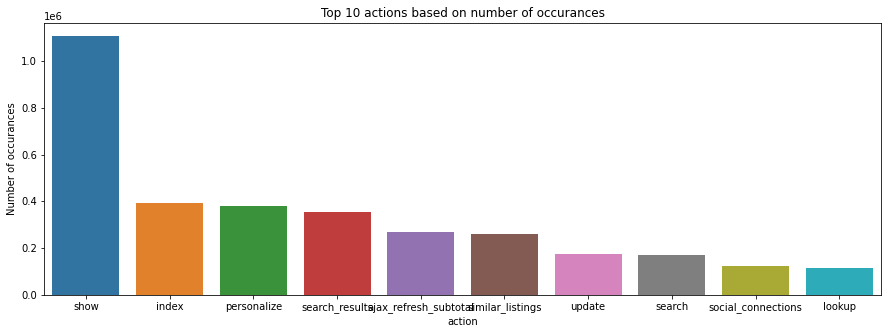

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=sessions_train,x='action',order=pd.value_counts(sessions_train['action']).iloc[:10].index)
plt.xlabel("action")
plt.ylabel('Number of occurances')
plt.title("Top 10 actions based on number of occurances")

We can see that the action 'show' occurs a lot of time in our dataset. The other actions are much lower compared to the 'show' action.

Text(0.5, 1.0, 'Top 10 action type based on number of occurances')

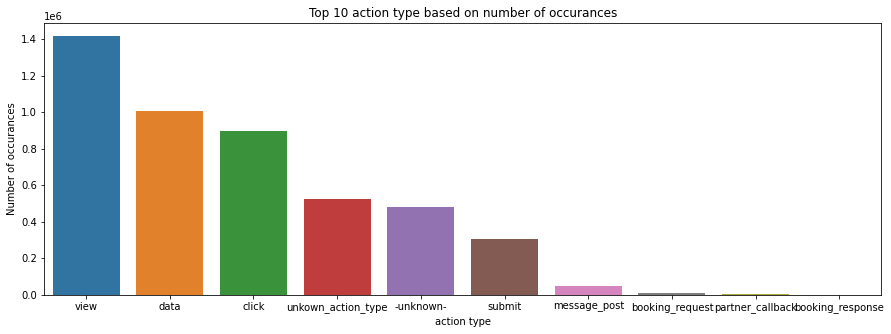

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=sessions_train,x='action_type',order=pd.value_counts(sessions_train['action_type']).iloc[:10].index)
plt.xlabel("action type")
plt.ylabel('Number of occurances')
plt.title("Top 10 action type based on number of occurances")

We can see that view,click,data,submit are the more frequent occuring action type in the dataset.

Text(0.5, 1.0, 'Top 10 device type based on number of occurances')

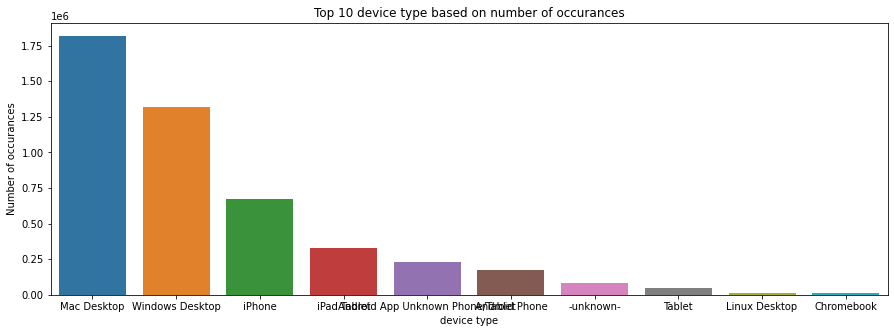

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=sessions_train,x='device_type',order=pd.value_counts(sessions_train['device_type']).iloc[:10].index)
plt.xlabel("device type")
plt.ylabel('Number of occurances')
plt.title("Top 10 device type based on number of occurances")

As we done this analysis before in the train_user dataset we can see that here. The desktops are the most prefered ones for the user to access the site followed by iphone and ipad. This graph is almost the same as we saw in the train_user dataset. 

Lets check how some feature interact with bookings done by the user

Let us analyse how the number of records for a users impacts booking of the users

In [ ]:
ndf=sessions_train_analysis[sessions_train_analysis['country_destination']=='NDF']['no_of_records'].values.astype(np.int)
us=sessions_train_analysis[sessions_train_analysis['country_destination']=='US']['no_of_records'].values.astype(np.int)
other=sessions_train_analysis[sessions_train_analysis['country_destination']=='other']['no_of_records'].values.astype(np.int)
au=sessions_train_analysis[sessions_train_analysis['country_destination']=='AU']['no_of_records'].values.astype(np.int)
ca=sessions_train_analysis[sessions_train_analysis['country_destination']=='CA']['no_of_records'].values.astype(np.int)
de=sessions_train_analysis[sessions_train_analysis['country_destination']=='DE']['no_of_records'].values.astype(np.int)
es=sessions_train_analysis[sessions_train_analysis['country_destination']=='ES']['no_of_records'].values.astype(np.int)
fr=sessions_train_analysis[sessions_train_analysis['country_destination']=='FR']['no_of_records'].values.astype(np.int)
gb=sessions_train_analysis[sessions_train_analysis['country_destination']=='GB']['no_of_records'].values.astype(np.int)
it=sessions_train_analysis[sessions_train_analysis['country_destination']=='IT']['no_of_records'].values.astype(np.int)
nl=sessions_train_analysis[sessions_train_analysis['country_destination']=='NL']['no_of_records'].values.astype(np.int)
pt=sessions_train_analysis[sessions_train_analysis['country_destination']=='PT']['no_of_records'].values.astype(np.int)

data=[ndf,us,other,au,ca,de,es,fr,gb,it,nl,pt]

Text(0.5, 0, 'Countries')

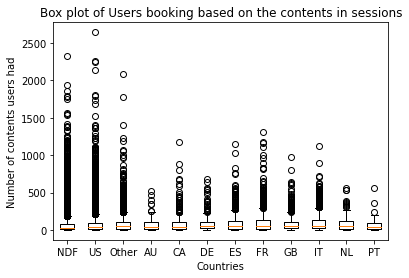

In [ ]:
plt.boxplot(data,labels=['NDF','US','Other','AU','CA','DE','ES','FR','GB','IT','NL','PT'])
plt.title("Box plot of Users booking based on the contents in sessions")
plt.ylabel("Number of contents users had")
plt.xlabel("Countries")

From the above box plot we can see that people who done booking to any countries have lot of records than the persons wo didn't book to any countries.

Median value of people who booked to countries other than US is higher than the US which show that many users who wish to go to other countries other than US used to have a lot of check ups on the website and thereby their record increases.

Thus this feature can be very much usefull for our prediction since the person who doesnt book would have just skimmed through the website and there by he would be having low contents in sessions. Wherelse a person who is intrested in going out checks a lot on the website and thus have many contents in sessions.

Lets analyse how the total time elapsed by a user helps us in predicting users preference. 

In [ ]:
ndf=sessions_train_analysis[sessions_train_analysis['country_destination']=='NDF']['sum_of_secs_elapsed'].values.astype(np.float)
us=sessions_train_analysis[sessions_train_analysis['country_destination']=='US']['sum_of_secs_elapsed'].values.astype(np.float)
other=sessions_train_analysis[sessions_train_analysis['country_destination']=='other']['sum_of_secs_elapsed'].values.astype(np.float)
au=sessions_train_analysis[sessions_train_analysis['country_destination']=='AU']['sum_of_secs_elapsed'].values.astype(np.float)
ca=sessions_train_analysis[sessions_train_analysis['country_destination']=='CA']['sum_of_secs_elapsed'].values.astype(np.float)
de=sessions_train_analysis[sessions_train_analysis['country_destination']=='DE']['sum_of_secs_elapsed'].values.astype(np.float)
es=sessions_train_analysis[sessions_train_analysis['country_destination']=='ES']['sum_of_secs_elapsed'].values.astype(np.float)
fr=sessions_train_analysis[sessions_train_analysis['country_destination']=='FR']['sum_of_secs_elapsed'].values.astype(np.float)
gb=sessions_train_analysis[sessions_train_analysis['country_destination']=='GB']['sum_of_secs_elapsed'].values.astype(np.float)
it=sessions_train_analysis[sessions_train_analysis['country_destination']=='IT']['sum_of_secs_elapsed'].values.astype(np.float)
nl=sessions_train_analysis[sessions_train_analysis['country_destination']=='NL']['sum_of_secs_elapsed'].values.astype(np.float)
pt=sessions_train_analysis[sessions_train_analysis['country_destination']=='PT']['sum_of_secs_elapsed'].values.astype(np.float)

data=[ndf,us,other,au,ca,de,es,fr,gb,it,nl,pt]

Text(0.5, 0, 'Countries')

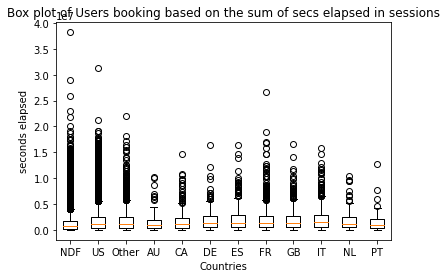

In [ ]:
plt.boxplot(data,labels=['NDF','US','Other','AU','CA','DE','ES','FR','GB','IT','NL','PT'])
plt.title("Box plot of Users booking based on the sum of secs elapsed in sessions")
plt.ylabel("seconds elapsed")
plt.xlabel("Countries")

This box plot shows the 50th percentile value of secs elapsed by the users who prefered a destination(ie US,AU,other,etc) is higher than that of the 50th percentile value of users who did not book to any destination(ie NDF). When we plot it in terms of distribution we can see some seperation between the distribution of one who booked to a country destination (ie US,other,FR,IT,etc) to that of one who didn't make any bookings(ie NDF).

This feature would indeed help us in giving good prediction.

Let us also check how standard deviation helps us.

In [ ]:
ndf=sessions_train_analysis[sessions_train_analysis['country_destination']=='NDF']['std_of_secs_elapsed'].values.astype(np.float)
us=sessions_train_analysis[sessions_train_analysis['country_destination']=='US']['std_of_secs_elapsed'].values.astype(np.float)
other=sessions_train_analysis[sessions_train_analysis['country_destination']=='other']['std_of_secs_elapsed'].values.astype(np.float)
au=sessions_train_analysis[sessions_train_analysis['country_destination']=='AU']['std_of_secs_elapsed'].values.astype(np.float)
ca=sessions_train_analysis[sessions_train_analysis['country_destination']=='CA']['std_of_secs_elapsed'].values.astype(np.float)
de=sessions_train_analysis[sessions_train_analysis['country_destination']=='DE']['std_of_secs_elapsed'].values.astype(np.float)
es=sessions_train_analysis[sessions_train_analysis['country_destination']=='ES']['std_of_secs_elapsed'].values.astype(np.float)
fr=sessions_train_analysis[sessions_train_analysis['country_destination']=='FR']['std_of_secs_elapsed'].values.astype(np.float)
gb=sessions_train_analysis[sessions_train_analysis['country_destination']=='GB']['std_of_secs_elapsed'].values.astype(np.float)
it=sessions_train_analysis[sessions_train_analysis['country_destination']=='IT']['std_of_secs_elapsed'].values.astype(np.float)
nl=sessions_train_analysis[sessions_train_analysis['country_destination']=='NL']['std_of_secs_elapsed'].values.astype(np.float)
pt=sessions_train_analysis[sessions_train_analysis['country_destination']=='PT']['std_of_secs_elapsed'].values.astype(np.float)

data=[ndf,us,other,au,ca,de,es,fr,gb,it,nl,pt]

Text(0.5, 0, 'Countries')

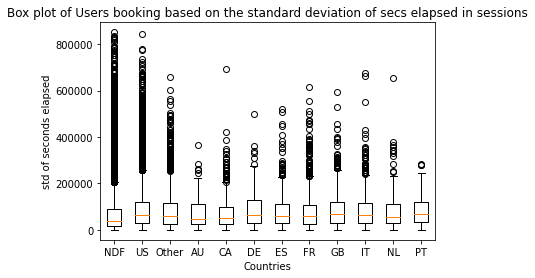

In [ ]:
plt.boxplot(data,labels=['NDF','US','Other','AU','CA','DE','ES','FR','GB','IT','NL','PT'])
plt.title("Box plot of Users booking based on the standard deviation of secs elapsed in sessions")
plt.ylabel("std of seconds elapsed")
plt.xlabel("Countries")

Standard deviation box plot shows even more better seperation than the count of recods and the sum of seconds elapsed. The person who prefers a country destination usuall have higher standard deviation to that of those who does'nt make bookings.

From the above three box plot it is evident that the box (ie 25th to 75th percentile) is smaller for NDF and somewhat bigger than NDF for all other destinations. This shows that the majority of people who do not prefer any destination just skim through the website wherelse the ones who decides to go out does an indepth scan.

Let us see how the feature 'less_than_equal_60sec_count' helps in users prediction. 'less_than_equal_60sec_count' is the number of actions less than 60 sec count.

Text(0, 0.5, 'Number of users')

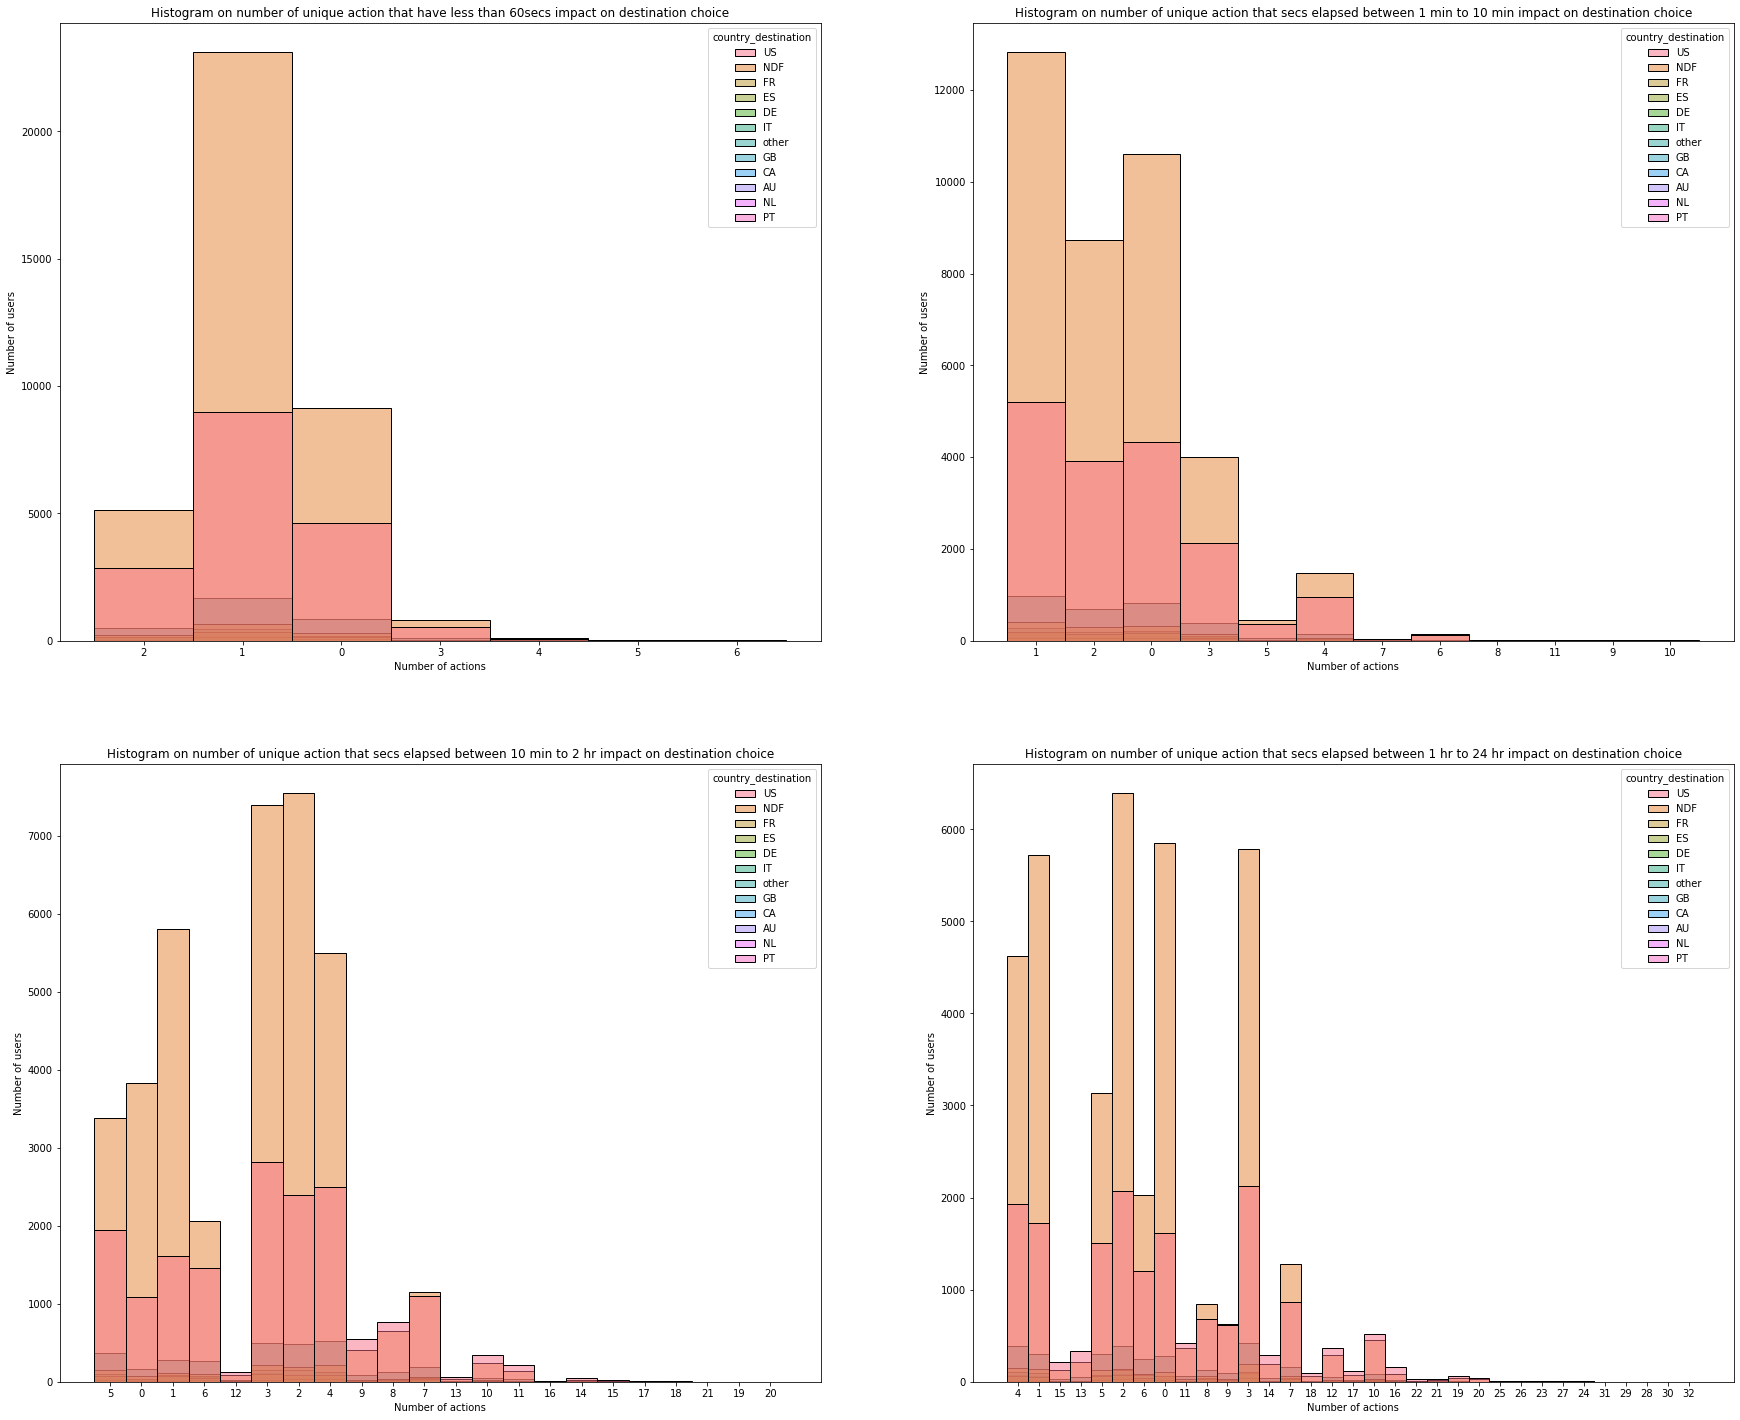

In [ ]:
plt.figure(figsize=(30,25))
plt.subplot(2,2,1)
sns.histplot(data=sessions_train_analysis,x='less_than_equal_60sec_count',hue='country_destination')
plt.title("Histogram on number of unique action that have less than 60secs impact on destination choice")
plt.xlabel('Number of actions')
plt.ylabel('Number of users')

plt.subplot(2,2,2)
sns.histplot(data=sessions_train_analysis,x='1min_to_10min_count',hue='country_destination')
plt.title("Histogram on number of unique action that secs elapsed between 1 min to 10 min impact on destination choice")
plt.xlabel('Number of actions')
plt.ylabel('Number of users')

plt.subplot(2,2,3)
sns.histplot(data=sessions_train_analysis,x='10min_to_1hr_count',hue='country_destination')
plt.title("Histogram on number of unique action that secs elapsed between 10 min to 2 hr impact on destination choice")
plt.xlabel('Number of actions')
plt.ylabel('Number of users')

plt.subplot(2,2,4)
sns.histplot(data=sessions_train_analysis,x='1hr_to_1day_count',hue='country_destination')
plt.title("Histogram on number of unique action that secs elapsed between 1 hr to 24 hr impact on destination choice")
plt.xlabel('Number of actions')
plt.ylabel('Number of users')

Text(0, 0.5, 'Number of users')

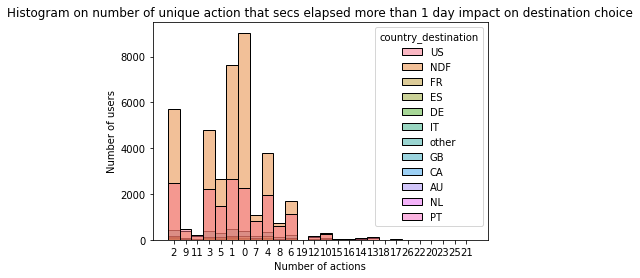

In [ ]:
sns.histplot(data=sessions_train_analysis,x='more_than_1day_count',hue='country_destination')
plt.title("Histogram on number of unique action that secs elapsed more than 1 day impact on destination choice")
plt.xlabel('Number of actions')
plt.ylabel('Number of users')

From all the above 5 diagrams we can see that as the number of counts of action increases the possibility that the users makes booking increases. 

#Cross Validation Sessions#

In [ ]:
index_of_action=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action.csv',index_col=0)
index_of_action_details=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_details.csv',index_col=0)
index_of_action_type=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_type.csv',index_col=0)
index_of_device_type=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_device_type.csv',index_col=0)

index_of_action=index_of_action.T
index_of_action_details=index_of_action_details.T
index_of_action_type=index_of_action_type.T
index_of_device_type=index_of_device_type.T

We should only have the same category(either in action, action type,action detail, device type) that we had for train data. If there are any new category it will be added as 'OTHER' category for action feature and 'unknown_action_detail','unknown_action_type','unknown_device_type' for action details, action type, device type.

In [ ]:
sessions_cv.action.fillna("unkown_action",inplace=True)
sessions_cv.action_detail.fillna('unknow_action_detail',inplace=True)
sessions_cv.action_type.fillna('unkown_action_type',inplace=True)
sessions_cv.device_type.fillna('unkown_device_type',inplace=True)

We will create a dictionary that has the keys of all unique values of action in both train and cv data. The value of the corresponding keys will be either 1 or 0 which shows whether the action is train sessions or not. This is followed for action type, action details and device type. If any new categorical value occurs in set we will treat it as a nan which means we will change those to 'unkown_action_type' for a  new value in action type feature and similarly for action detail and device type.

####For action####

In [ ]:
is_in_train={}
for i in sessions_cv.action.unique():
  is_in_train[i]=0
for i in index_of_action.columns:
  is_in_train[i]=1

In [ ]:
sessions_cv.action=sessions_cv.action.apply(lambda x: 'OTHER' if is_in_train[x]==0 else x)

####For action type####

In [ ]:
is_in_train={}
for i in sessions_cv.action_type.unique():
  is_in_train[i]=0
for i in index_of_action_type.columns:
  is_in_train[i]=1

In [ ]:
sessions_cv.action_type=sessions_cv.action_type.apply(lambda x: 'unkown_action_type' if is_in_train[x]==0 else x)

####For action detail####

In [ ]:
is_in_train={}
for i in sessions_cv.action_detail.unique():
  is_in_train[i]=0
for i in index_of_action_details.columns:
  is_in_train[i]=1

In [ ]:
sessions_cv.action_detail=sessions_cv.action_detail.apply(lambda x: 'unknow_action_detail' if is_in_train[x]==0 else x)

####For device type####

In [ ]:
is_in_train={}
for i in sessions_cv.device_type.unique():
  is_in_train[i]=0
for i in index_of_device_type.columns:
  is_in_train[i]=1

In [ ]:
sessions_cv.device_type=sessions_cv.device_type.apply(lambda x: 'unkown_device_type' if is_in_train[x]==0 else x)

In [ ]:
print("Unique Values in train set:")
print("For device_type:",len(index_of_device_type.columns))
print("For action:",len(index_of_action.columns))
print("For action_type:",len(index_of_action_type.columns))
print("For action_detail:",len(index_of_action_details.columns))
print("*"*10)

print("Unique Values in cv data:")
print("For device_type:",len(sessions_cv.device_type.unique()))
print("For action:",len(sessions_cv.action.unique()))
print("For action_type:",len(sessions_cv.action_type.unique()))
print("For device_detail:",len(sessions_cv.action_detail.unique()))

Unique Values in train set:
For device_type: 14
For action: 247
For action_type: 10
For action_detail: 129
**********
Unique Values in cv data:
For device_type: 13
For action: 247
For action_type: 10
For device_detail: 126


###Feature Engineering###

The same that we did for training session data is followed for CV sessions data.

In [ ]:
from tqdm import tqdm

index_of_action=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action.csv',index_col=0).T
index_of_action_details=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_details.csv',index_col=0).T
index_of_action_type=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_type.csv',index_col=0).T
index_of_device_type=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_device_type.csv',index_col=0).T
  
sess_id_group=sessions_cv.groupby(['user_id'])

samples = []
cont = 0
ln = len(sess_id_group)
for id_session in tqdm(sess_id_group):
    details_of_id = id_session[1]
    l = []
      
    #the id
    l.append(id_session[0])
      
    #The actual first feature is the number of values.
    l.append(len(details_of_id))

    #For Action 
    #Number of times unique action value occurs
    feature_action=[0]*len(index_of_action.columns)
    for i,action in enumerate(details_of_id.action.values):
      feature_action[index_of_action[action][0]]+=1
    l=l+feature_action

    #For action_detail
    #Number of times unique action_detail value occurs
    feature_action_detail=[0]*len(index_of_action_details.columns)
    for i,action in enumerate(details_of_id.action_detail.values):
      feature_action_detail[index_of_action_details[action][0]]+=1
    l=l+feature_action_detail


    #For action_type 
    #Number of times unique action_type value occurs
    feature_action_type=[0]*len(index_of_action_type.columns)
    for i,action in enumerate(details_of_id.action_type.values):
      feature_action_type[index_of_action_type[action][0]]+=1
    l=l+feature_action_type

    #For Device type
    #Number of times unique device_type value occurs
    feature_device_type=[0]*len(index_of_device_type.columns)
    for i,device in enumerate(details_of_id.device_type.values):
      feature_device_type[index_of_device_type[device][0]]+=1
    l=l+feature_device_type

    #For seconds elapsed 
    secs=details_of_id.secs_elapsed.fillna(0).values
    feature_secs=[0]*4
    if len(secs)>0:
      feature_secs[0]=np.sum(secs)
      feature_secs[1]=np.mean(secs)
      feature_secs[2]=np.std(secs)
      feature_secs[3]=np.median(secs)
    l=l+feature_secs
    
    #Secs elapsed representation
    feature_action_secs_elapsed_represent=[0]*5
    details_of_id.secs_elapsed.fillna(0,inplace=True)
    if len(secs)>0:
      for i,action in enumerate(details_of_id.action.unique()):
        sec_elapsed_sum=details_of_id[details_of_id.action==action]['secs_elapsed'].values.sum()
        if sec_elapsed_sum<=60:#less than a minute
          feature_action_secs_elapsed_represent[0]+=1
        elif sec_elapsed_sum>60 and sec_elapsed_sum<=600:#between 1 minute to 10 minute
          feature_action_secs_elapsed_represent[1]+=1
        elif sec_elapsed_sum>600 and sec_elapsed_sum<=7200:#between 10 minutes to 2 hours
          feature_action_secs_elapsed_represent[2]+=1
        elif sec_elapsed_sum>7200 and sec_elapsed_sum<=86400:#between 2 hours to 24 hours
          feature_action_secs_elapsed_represent[3]+=1
        elif sec_elapsed_sum>86400: #greater than 24 hours
          feature_action_secs_elapsed_represent[4]+=1        
    l=l+feature_action_secs_elapsed_represent

    #Percentage of presence of an action in the id
    feature_action_presence=[0]*len(index_of_action.columns)
    for i,action in enumerate(details_of_id.action.unique()):
      feature_action_presence[index_of_action[action][0]]+=details_of_id[details_of_id.action==action].count()['action']/len(details_of_id.action)
    l=l+feature_action_presence

    #percentage of presence of action type in id
    action_type_unique_counts=np.unique(details_of_id.action_type,return_counts=True)
    unknown_action_index=np.where(action_type_unique_counts[0]=='unkown_action_type')
    unique_action_type=np.delete(action_type_unique_counts[0],unknown_action_index)
    unique_action_type_count=np.delete(action_type_unique_counts[1],unknown_action_index)
    feature_action_type_presence=[0]*len(index_of_action_type.columns)
    for i,action in enumerate(details_of_id.action_type.unique()):
      if action!='unkown_action_type':
        action_type_index=np.where(unique_action_type==action)
        action_type_count=unique_action_type_count[action_type_index]
        feature_action_type_presence[index_of_action_type[action][0]]+=action_type_count[0]/np.sum(unique_action_type_count)
    l=l+feature_action_type_presence

    samples.append(l)

100%|██████████| 11073/11073 [05:04<00:00, 36.36it/s]


In [ ]:
#Setting Column names
column_names=[]

index_of_action=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action.csv',index_col=0).T
index_of_action_details=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_details.csv',index_col=0).T
index_of_action_type=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_type.csv',index_col=0).T
index_of_device_type=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_device_type.csv',index_col=0).T


#count
column_names.append('id')
column_names.append('no_of_records')
to_add_list=[0]*len(index_of_action.columns)
for i in index_of_action.keys():
  to_add_list[index_of_action[i][0]]=i+' (count)'
column_names=column_names+to_add_list
to_add_list=[0]*len(index_of_action_details.columns)
for i in index_of_action_details.keys():
  to_add_list[index_of_action_details[i][0]]=i+' (count)'
column_names=column_names+to_add_list
to_add_list=[0]*len(index_of_action_type.columns)
for i in index_of_action_type.keys():
  to_add_list[index_of_action_type[i][0]]=i+' (count)'
column_names=column_names+to_add_list
to_add_list=[0]*len(index_of_device_type.columns)
for i in index_of_device_type.keys():
  to_add_list[index_of_device_type[i][0]]=i+' (count)'
column_names=column_names+to_add_list
column_names.append('sum_of_secs_elapsed')
column_names.append('mean_of_secs_elapsed')
column_names.append('std_of_secs_elapsed')
column_names.append('median_of_secs_elapsed')
column_names.append('less_than_equal_60sec_count')
column_names.append('1min_to_10min_count')
column_names.append('10min_to_1hr_count')
column_names.append('1hr_to_1day_count')
column_names.append('more_than_1day_count')
to_add_list=[0]*len(index_of_action.columns)
for i in index_of_action.keys():
  to_add_list[index_of_action[i][0]]=i+' (action presence)%'
column_names=column_names+to_add_list
to_add_list=[0]*len(index_of_action_type.columns)
for i in index_of_action_type.keys():
  to_add_list[index_of_action_type[i][0]]=i+' (action type presence)%'
column_names=column_names+to_add_list
print(len(column_names))

668


In [ ]:
samples=np.array(samples)

In [ ]:
sessions_cv_preprocessed=pd.DataFrame(samples,columns=column_names)
sessions_cv_preprocessed.drop(['unkown_action_type (action type presence)%'],axis=1,inplace=True)
preprocessed_cv=sessions_cv_preprocessed.merge(X_cv_data,how='inner',left_on='id',right_on='id')
preprocessed_cv.head()

,id,no_of_records,change_availability (count),create_paypal (count),departments (count),locations (count),host_2013 (count),slideshow (count),unread (count),phone_verification_call_taking_too_long (count),badge (count),invalid_action (count),p4_terms (count),hospitality (count),social (count),show_code (count),how_it_works (count),detect_fb_session (count),founders (count),ajax_worth (count),payoneer_account_redirect (count),request_photography (count),phone_verification_phone_number_removed (count),hospitality_standards (count),home_safety_landing (count),multi_message_attributes (count),reputation (count),press_release (count),multi_message (count),clear_reservation (count),concierge (count),add_guests (count),widget (count),office_location (count),check (count),place_worth (count),change_password (count),p4_refund_policy_terms (count),become_user (count),why_host (count),...,x0_seo,x0_bing,x0_craigslist,x0_direct.1,x0_facebook.1,x0_facebook-open-graph,x0_google.1,x0_gsp,x0_meetup,x0_other.1,x0_padmapper,x0_smallcontribution,x0_vast,x0_yahoo,x0_linked,x0_omg,x0_others,x0_product,x0_tracked-other,x0_untracked,x0_Android,x0_Moweb,x0_Web,x0_iOS,x0_Android Phone,x0_Android Tablet,x0_Desktop (Other),x0_Mac Desktop,x0_Other/Unknown,x0_SmartPhone (Other),x0_Windows Desktop,x0_iPad,x0_iPhone,x0_-unknown-.1,x0_Chrome,x0_Firefox,x0_IE,x0_Mobile Safari,x0_Other.1,x0_Safari
0,001wyh0pz8,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,003iamz20l,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,006mls2sjw,195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,009a40t3dk,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,00cyqikqy3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
preprocessed_cv.to_csv('/content/drive/MyDrive/Airbnb trail/overall_preprocessed_cv.csv')

#Test Sessions#

The same procedure done for cv is done for test sessions dataset.

In [ ]:
index_of_action=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action.csv',index_col=0)
index_of_action_details=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_details.csv',index_col=0)
index_of_action_type=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_type.csv',index_col=0)
index_of_device_type=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_device_type.csv',index_col=0)

index_of_action=index_of_action.T
index_of_action_details=index_of_action_details.T
index_of_action_type=index_of_action_type.T
index_of_device_type=index_of_device_type.T

In [ ]:
sessions_test.action.fillna("unkown_action",inplace=True)
sessions_test.action_detail.fillna('unknow_action_detail',inplace=True)
sessions_test.action_type.fillna('unkown_action_type',inplace=True)
sessions_test.device_type.fillna('unkown_device_type',inplace=True)

####For action####

In [ ]:
#We need to have unique action values that are used in the train sessions data
is_in_train={}
for i in sessions_test.action.unique():
  is_in_train[i]=0
for i in index_of_action.columns:
  is_in_train[i]=1

In [ ]:
sessions_test.action=sessions_test.action.apply(lambda x: 'OTHER' if is_in_train[x]==0 else x)

####For action type####

In [ ]:
is_in_train={}
for i in sessions_test.action_type.unique():
  is_in_train[i]=0
for i in index_of_action_type.columns:
  is_in_train[i]=1

In [ ]:
sessions_test.action_type=sessions_test.action_type.apply(lambda x: 'unkown_action_type' if is_in_train[x]==0 else x)

####For action detail####

In [ ]:
is_in_train={}
for i in sessions_test.action_detail.unique():
  is_in_train[i]=0
for i in index_of_action_details.columns:
  is_in_train[i]=1

In [ ]:
sessions_test.action_detail=sessions_test.action_detail.apply(lambda x: 'unknow_action_detail' if is_in_train[x]==0 else x)

####For device type####

In [ ]:
is_in_train={}
for i in sessions_test.device_type.unique():
  is_in_train[i]=0
for i in index_of_device_type.columns:
  is_in_train[i]=1

In [ ]:
sessions_test.device_type=sessions_test.device_type.apply(lambda x: 'unkown_device_type' if is_in_train[x]==0 else x)

####Feature Engineering####

In [ ]:
from tqdm import tqdm

index_of_action=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action.csv',index_col=0).T
index_of_action_details=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_details.csv',index_col=0).T
index_of_action_type=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_type.csv',index_col=0).T
index_of_device_type=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_device_type.csv',index_col=0).T
  
sess_id_group=sessions_test.groupby(['user_id'])

samples = []
ln = len(sess_id_group)
for id_session in tqdm(sess_id_group):
    details_of_id = id_session[1]
    l = []
      
    #the id
    l.append(id_session[0])
      
    #The actual first feature is the number of values.
    l.append(len(details_of_id))

    #For Action 
    #Number of times unique action value occurs
    feature_action=[0]*len(index_of_action.columns)
    for i,action in enumerate(details_of_id.action.values):
      feature_action[index_of_action[action][0]]+=1
    l=l+feature_action

    #For action_detail
    #Number of times unique action_detail value occurs
    feature_action_detail=[0]*len(index_of_action_details.columns)
    for i,action in enumerate(details_of_id.action_detail.values):
      feature_action_detail[index_of_action_details[action][0]]+=1
    l=l+feature_action_detail


    #For action_type 
    #Number of times unique action_type value occurs
    feature_action_type=[0]*len(index_of_action_type.columns)
    for i,action in enumerate(details_of_id.action_type.values):
      feature_action_type[index_of_action_type[action][0]]+=1
    l=l+feature_action_type

    #For Device type
    #Number of times unique device_type value occurs
    feature_device_type=[0]*len(index_of_device_type.columns)
    for i,device in enumerate(details_of_id.device_type.values):
      feature_device_type[index_of_device_type[device][0]]+=1
    l=l+feature_device_type

    #For seconds elapsed 
    secs=details_of_id.secs_elapsed.fillna(0).values
    feature_secs=[0]*4
    if len(secs)>0:
      feature_secs[0]=np.sum(secs)
      feature_secs[1]=np.mean(secs)
      feature_secs[2]=np.std(secs)
      feature_secs[3]=np.median(secs)
    l=l+feature_secs

    #Secs elapsed representation
    feature_action_secs_elapsed_represent=[0]*5
    details_of_id.secs_elapsed.fillna(0,inplace=True)
    if len(secs)>0:
      for i,action in enumerate(details_of_id.action.unique()):
        sec_elapsed_sum=details_of_id[details_of_id.action==action]['secs_elapsed'].values.sum()
        if sec_elapsed_sum<=60:#less than a minute
          feature_action_secs_elapsed_represent[0]+=1
        elif sec_elapsed_sum>60 and sec_elapsed_sum<=600:#between 1 minute to 10 minute
          feature_action_secs_elapsed_represent[1]+=1
        elif sec_elapsed_sum>600 and sec_elapsed_sum<=7200:#between 10 minutes to 2 hours
          feature_action_secs_elapsed_represent[2]+=1
        elif sec_elapsed_sum>7200 and sec_elapsed_sum<=86400:#between 2 hours to 24 hours
          feature_action_secs_elapsed_represent[3]+=1
        elif sec_elapsed_sum>86400: #greater than 24 hours
          feature_action_secs_elapsed_represent[4]+=1        
    l=l+feature_action_secs_elapsed_represent

    #Percentage of presence of an action in the id
    feature_action_presence=[0]*len(index_of_action.columns)
    for i,action in enumerate(details_of_id.action.unique()):
      feature_action_presence[index_of_action[action][0]]+=details_of_id[details_of_id.action==action].count()['action']/len(details_of_id.action)
    l=l+feature_action_presence

    #percentage of presence of action type in id
    action_type_unique_counts=np.unique(details_of_id.action_type,return_counts=True)
    unknown_action_index=np.where(action_type_unique_counts[0]=='unkown_action_type')
    unique_action_type=np.delete(action_type_unique_counts[0],unknown_action_index)
    unique_action_type_count=np.delete(action_type_unique_counts[1],unknown_action_index)
    feature_action_type_presence=[0]*len(index_of_action_type.columns)
    for i,action in enumerate(details_of_id.action_type.unique()):
      if action!='unkown_action_type':
        action_type_index=np.where(unique_action_type==action)
        action_type_count=unique_action_type_count[action_type_index]
        feature_action_type_presence[index_of_action_type[action][0]]+=action_type_count[0]/np.sum(unique_action_type_count)
    l=l+feature_action_type_presence

    samples.append(l)

100%|██████████| 61668/61668 [34:31<00:00, 29.77it/s]


In [ ]:
#Setting Column names
column_names=[]

index_of_action=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action.csv',index_col=0).T
index_of_action_details=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_details.csv',index_col=0).T
index_of_action_type=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_action_type.csv',index_col=0).T
index_of_device_type=pd.read_csv('/content/drive/MyDrive/Airbnb trail/index_of_device_type.csv',index_col=0).T


#count
column_names.append('id')
column_names.append('no_of_records')
to_add_list=[0]*len(index_of_action.columns)
for i in index_of_action.keys():
  to_add_list[index_of_action[i][0]]=i+' (count)'
column_names=column_names+to_add_list
to_add_list=[0]*len(index_of_action_details.columns)
for i in index_of_action_details.keys():
  to_add_list[index_of_action_details[i][0]]=i+' (count)'
column_names=column_names+to_add_list
to_add_list=[0]*len(index_of_action_type.columns)
for i in index_of_action_type.keys():
  to_add_list[index_of_action_type[i][0]]=i+' (count)'
column_names=column_names+to_add_list
to_add_list=[0]*len(index_of_device_type.columns)
for i in index_of_device_type.keys():
  to_add_list[index_of_device_type[i][0]]=i+' (count)'
column_names=column_names+to_add_list
column_names.append('sum_of_secs_elapsed')
column_names.append('mean_of_secs_elapsed')
column_names.append('std_of_secs_elapsed')
column_names.append('median_of_secs_elapsed')
column_names.append('less_than_equal_60sec_count')
column_names.append('1min_to_10min_count')
column_names.append('10min_to_1hr_count')
column_names.append('1hr_to_1day_count')
column_names.append('more_than_1day_count')
to_add_list=[0]*len(index_of_action.columns)
for i in index_of_action.keys():
  to_add_list[index_of_action[i][0]]=i+' (action presence)%'
column_names=column_names+to_add_list
to_add_list=[0]*len(index_of_action_type.columns)
for i in index_of_action_type.keys():
  to_add_list[index_of_action_type[i][0]]=i+' (action type presence)%'
column_names=column_names+to_add_list
print(len(column_names))

668


We have certain test data user who are not present in sessions dataset. We can fill all session features to 0 for those who are not in sessions dataset.

In [ ]:
#getting left out ids
left_out_ids=list((set(test_data['id'])).difference(set(sessions_data['user_id'])))

In [ ]:
#filling all sessions value to 0 for test users who are not in sessions data
for id in range(len(left_out_ids)):
  left_out=[left_out_ids[id]]+[0]*(len(column_names)-1)
  samples.append(left_out)

In [ ]:
samples=np.array(samples)
print(samples.shape)

(62096, 668)


In [ ]:
sessions_test_preprocessed=pd.DataFrame(samples,columns=column_names)
sessions_test_preprocessed.drop(['unkown_action_type (action type presence)%'],axis=1,inplace=True)
preprocessed_test=sessions_test_preprocessed.merge(X_test_data,how='inner',left_on='id',right_on='id')
preprocessed_test.head()

,id,no_of_records,change_availability (count),create_paypal (count),departments (count),locations (count),host_2013 (count),slideshow (count),unread (count),phone_verification_call_taking_too_long (count),badge (count),invalid_action (count),p4_terms (count),hospitality (count),social (count),show_code (count),how_it_works (count),detect_fb_session (count),founders (count),ajax_worth (count),payoneer_account_redirect (count),request_photography (count),phone_verification_phone_number_removed (count),hospitality_standards (count),home_safety_landing (count),multi_message_attributes (count),reputation (count),press_release (count),multi_message (count),clear_reservation (count),concierge (count),add_guests (count),widget (count),office_location (count),check (count),place_worth (count),change_password (count),p4_refund_policy_terms (count),become_user (count),why_host (count),...,x0_seo,x0_bing,x0_craigslist,x0_direct.1,x0_facebook.1,x0_facebook-open-graph,x0_google.1,x0_gsp,x0_meetup,x0_other.1,x0_padmapper,x0_smallcontribution,x0_vast,x0_yahoo,x0_linked,x0_omg,x0_others,x0_product,x0_tracked-other,x0_untracked,x0_Android,x0_Moweb,x0_Web,x0_iOS,x0_Android Phone,x0_Android Tablet,x0_Desktop (Other),x0_Mac Desktop,x0_Other/Unknown,x0_SmartPhone (Other),x0_Windows Desktop,x0_iPad,x0_iPhone,x0_-unknown-.1,x0_Chrome,x0_Firefox,x0_IE,x0_Mobile Safari,x0_Other.1,x0_Safari
0,0010k6l0om,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0031awlkjq,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,00378ocvlh,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0048rkdgb1,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,0057snrdpu,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
preprocessed_test.to_csv('/content/drive/MyDrive/Airbnb trail/overall_preprocessed_test.csv')